#### read in the data

In [2]:
# read full data in
import pandas as pd

df = pd.read_csv('Though listing and Regulation.csv')

In [3]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,20_healthRT_Click Count,debrief1,debrief2,consent2,SC0,SC1,SC2,SC3,id,Condition
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Timing - https://utorontopsych.az1.qualtrics.c...,What do you think the purpose of this study was?,Did you notice anything odd about the study? W...,Participant Consent: My signature indicates I ...,English_Test,Reasons_Test,Reg_Test,Native_Eng,id,Condition
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""20_QID171_CLICK_COUNT""}","{""ImportId"":""QID113_TEXT""}","{""ImportId"":""QID114_TEXT""}","{""ImportId"":""QID95""}","{""ImportId"":""SC_3kq6pM8K2KXJ3UN""}","{""ImportId"":""SC_8AkbAZDb1qk88WF""}","{""ImportId"":""SC_6fHiZnwJgVKQ6O1""}","{""ImportId"":""SC_cYe6UJrN9QdqQQJ""}","{""ImportId"":""id""}","{""ImportId"":""Condition""}"
2,2019-11-28 12:48,2019-11-28 13:10,IP Address,98.247.142.31,100,1326,TRUE,2019-11-28 13:10,R_2Yf9NqzNdvMSCnH,NaN,...,1,Gauge influence of healthy eating reminders on...,nope!,I agree,5,3,2,1,49672855,Health
3,2019-11-28 12:39,2019-11-28 13:10,IP Address,99.111.130.223,100,1864,TRUE,2019-11-28 13:10,R_1d6mWtvT33pT6K5,NaN,...,1,To see how people feel about certain foods bef...,I did not notice anything odd,I agree,5,2,2,1,38501484,Health
4,2019-11-28 12:38,2019-11-28 13:11,IP Address,71.219.142.102,100,1972,TRUE,2019-11-28 13:11,R_2dEfOsx1KRXrUs0,NaN,...,1,DETERMINE MY CHOICES IN FOOD,NONE,I agree,3,2,1,1,24539356,Natural


In [5]:
df[df['Finished']!='TRUE']
df.shape

(273, 1197)

#### select data for processing


In [6]:
# make a list of columns to process
columnsToUse = ['Progress','gender','location','ethnicity','age','healthyEating_1','dietaryRestriction',
                'foodAllergies','Native English Speak','Eng. Q1','Eng. Q2','Eng. Q3','Eng. Q4','Eng. Q5',
                'Eng. Q6','hunger_1','Condition']
#fill in 20 item colums
for n in range(1,21):
    columnsToUse.append(str(n)+'_choicePre')
    columnsToUse.append(str(n)+'_choicePost')
    columnsToUse.append(str(n)+'_ChoiceTask_Resp')
    columnsToUse.append(str(n)+'_Reason1')
    columnsToUse.append(str(n)+'_Reason2')
    columnsToUse.append(str(n)+'_Reason3')
    columnsToUse.append(str(n)+'_Reason4')
    columnsToUse.append(str(n)+'_taste')
    columnsToUse.append(str(n)+'_health')
    
columnsToUse.append('debrief1')
columnsToUse.append('debrief2')
# columnsToUse


In [7]:
# create new dataframe with wanted columns and rows
dfInUse = df[columnsToUse].copy()
dfInUse.drop(axis=0, index=[0,1],inplace=True)

In [8]:
dfInUse

,Progress,gender,location,ethnicity,age,healthyEating_1,dietaryRestriction,foodAllergies,Native English Speak,Eng. Q1,...,20_choicePost,20_ChoiceTask_Resp,20_Reason1,20_Reason2,20_Reason3,20_Reason4,20_taste,20_health,debrief1,debrief2
2,100,Female,United States,White/Caucasian,47,38,NaN,NaN,I am a native English speaker,Incorrect,...,Dislike,"No, I would not like to eat this",I'd rather have real fruit,NaN,NaN,NaN,Slightly tasty,Slightly unhealthy,Gauge influence of healthy eating reminders on...,nope!
3,100,Male,United States,White/Caucasian,21,83,None,None,I am a native English speaker,Incorrect,...,Dislike,"No, I would not like to eat this",High sugar,NaN,NaN,NaN,Slightly tasty,Very healthy,To see how people feel about certain foods bef...,I did not notice anything odd
4,100,Female,United States,White/Caucasian,48,81,NONE,NONE,I am a native English speaker,Incorrect,...,Like,"Yes, I would like to eat this",THESE ARE SWEET AND CHEWY,NaN,NaN,NaN,Very tasty,Very unhealthy,DETERMINE MY CHOICES IN FOOD,NONE
5,100,Male,United States,White/Caucasian,28,99,none,none,I am a native English speaker,Correct,...,Strong like,"Yes, I would like to eat this",it was good for health,NaN,NaN,NaN,Slightly tasty,Neither healthy nor unhealthy.,know about the food taste and health.,none
6,100,Male,Canada,White/Caucasian,27,64,None.,None.,I am not a native English speaker,Incorrect,...,Strong like,"Yes, I would like to eat this",Fruits snacks aren't healthy.,Fruit snacks are tasty.,NaN,NaN,Slightly tasty,Slightly unhealthy,Understand how people chose what they want to ...,I did not notice anything odd (other than the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,38,Male,United States,African Canadian/Black,25,100,NaN,NaN,I am a native English speaker,Correct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,12,Female,United States,African Canadian/Black,31,76,none,none,I am a native English speaker,Incorrect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,13,Female,United States,White/Caucasian,50,61,n0,no,I am a native English speaker,Incorrect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,73,Female,United States,White/Caucasian,39,72,no,no,I am a native English speaker,Incorrect,...,NaN,"Yes, I would like to eat this",These are healthy and delicious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# break into 2 dataframes for Natural and Health conditions
df_Nat    = dfInUse[dfInUse['Condition']=='Natural']
df_Health = dfInUse[dfInUse['Condition']=='Health']
# df_Nat.shape

# extraxt all reasons into a list
reasons_nat    = list()
reasons_health = list()

for s in range(df_Nat.shape[0]):
    for n in range(1,21):
        reasons_nat.append(df_Nat[str(n)+'_Reason1'].iloc[s])
        reasons_nat.append(df_Nat[str(n)+'_Reason2'].iloc[s])
        reasons_nat.append(df_Nat[str(n)+'_Reason3'].iloc[s])
        reasons_nat.append(df_Nat[str(n)+'_Reason4'].iloc[s])
        
for s in range(df_Health.shape[0]):
    for n in range(1,21):
        reasons_health.append(df_Health[str(n)+'_Reason1'].iloc[s])
        reasons_health.append(df_Health[str(n)+'_Reason2'].iloc[s])
        reasons_health.append(df_Health[str(n)+'_Reason3'].iloc[s])
        reasons_health.append(df_Health[str(n)+'_Reason4'].iloc[s])

In [12]:
# reasons_nat

In [13]:
# get rid on nan entries
from itertools import compress

reasons_nat    = list(compress(reasons_nat, pd.notna(reasons_nat)))
reasons_health = list(compress(reasons_health, pd.notna(reasons_health)))

In [7]:
#  pd.notna(reasons_health)
# # pd.

array([ True,  True,  True, ...,  True,  True,  True])

### Topic modeling using LDA

#### separate models for Natural and Health

In [14]:
# create and train the count vectorizer ; 
# this creates a sparse matrix of document x word containing how many times each word was repeated in a document(reason)
from sklearn.feature_extraction.text import CountVectorizer
cv_nat     = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
cv_health  = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_nat    = cv_nat.fit_transform(reasons_nat)
dtm_health = cv_health.fit_transform(reasons_health)

In [10]:
dtm_nat # reason X words

<2884x552 sparse matrix of type '<class 'numpy.int64'>'
	with 7643 stored elements in Compressed Sparse Row format>

In [37]:
# create and train the LDA model
from sklearn.decomposition import LatentDirichletAllocation
LDA_nat    = LatentDirichletAllocation(n_components=3,random_state=42) # choose how many topics (2 to 5)
LDA_health = LatentDirichletAllocation(n_components=3,random_state=42)


In [38]:
LDA_nat.fit(dtm_nat)
LDA_health.fit(dtm_health)

LatentDirichletAllocation(n_components=3, random_state=42)

In [39]:
print(len(cv_nat.get_feature_names())) # features are words
print(len(cv_health.get_feature_names())) # features are words

552
555


In [19]:
# print(cv_nat.get_feature_names())
# print(cv_health.get_feature_names())

In [40]:
len(LDA_nat.components_) # number of topics (predefined by user when training)

3

In [41]:
print(LDA_nat.components_[0].argsort()[-10:]) # list of word indicies with highest occurences in each topic
print(LDA_health.components_[0].argsort()[-10:])

[ 46 125 491 186 153 293 152 475 483 281]
[282 185 279 163  69  34 180 223 472 264]


In [42]:
# display words whose indicies are displayed above
for index in LDA_nat.components_[0].argsort()[-10:]:
    print(cv_nat.get_feature_names()[index])
print('\n')
for index in LDA_health.components_[0].argsort()[-10:]:
    print(cv_health.get_feature_names()[index])

bland
crunchy
texture
flavor
dont
love
don
sweet
taste
like


low
fruit
lot
fat
calories
bad
food
high
sugar
like


In [43]:
# list words with highest occurence in each topic
for index,topic in enumerate(LDA_nat.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index} IN NATURAL ARE:')
    print(''.join([cv_nat.get_feature_names()[ind]+' '+ str(round(topic[ind], 2)) +'| ' for ind in topic.argsort()[:-11:-1]]))
    print('\n')

print('\n\n')

for index,topic in enumerate(LDA_health.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index} IN HEALTH ARE:')
    print(''.join([cv_health.get_feature_names()[ind]+' '+ str(round(topic[ind], 2)) +'| ' for ind in topic.argsort()[:-11:-1]]))
    print('\n')
    

TOP 10 WORDS FOR TOPIC #0 IN NATURAL ARE:
like 462.11| taste 368.8| sweet 151.29| don 137.29| love 75.61| dont 75.3| flavor 68.29| texture 68.11| crunchy 61.68| bland 57.28| 


TOP 10 WORDS FOR TOPIC #1 IN NATURAL ARE:
eat 194.87| food 140.31| like 125.23| looks 84.28| chocolate 75.27| love 62.99| cream 62.31| ice 54.32| unhealthy 54.3| bad 47.27| 


TOP 10 WORDS FOR TOPIC #2 IN NATURAL ARE:
good 416.46| healthy 261.31| tasty 128.24| tastes 95.29| love 71.4| delicious 68.04| snack 58.71| great 46.64| green 39.29| hate 37.15| 





TOP 10 WORDS FOR TOPIC #0 IN HEALTH ARE:
like 418.99| sugar 352.31| high 213.9| food 125.75| bad 97.15| calories 88.3| fat 81.31| lot 80.34| fruit 62.27| low 42.88| 


TOP 10 WORDS FOR TOPIC #1 IN HEALTH ARE:
tasty 201.31| eat 197.41| unhealthy 92.72| love 87.03| chocolate 61.06| fiber 53.28| crunchy 43.31| processed 43.3| looks 37.29| favorite 32.31| 


TOP 10 WORDS FOR TOPIC #2 IN HEALTH ARE:
healthy 569.13| good 493.82| taste 241.96| tastes 127.23| sweet 1

In [44]:
for index,topic in enumerate(LDA_health.exp_dirichlet_component_):
    print(f'TOP 10 WORDS FOR TOPIC #{index} IN HEALTH ARE:')
    print(''.join([cv_health.get_feature_names()[ind]+' '+ str(round(topic[ind], 2)) +'| ' for ind in topic.argsort()[-10:]]))
    print('\n')
    

TOP 10 WORDS FOR TOPIC #0 IN HEALTH ARE:
low 0.01| fruit 0.02| lot 0.03| fat 0.03| calories 0.03| bad 0.03| food 0.04| high 0.07| sugar 0.12| like 0.14| 


TOP 10 WORDS FOR TOPIC #1 IN HEALTH ARE:
favorite 0.01| looks 0.01| processed 0.02| crunchy 0.02| fiber 0.02| chocolate 0.02| love 0.03| unhealthy 0.04| eat 0.08| tasty 0.08| 


TOP 10 WORDS FOR TOPIC #2 IN HEALTH ARE:
vegetable 0.02| snack 0.02| don 0.02| vitamins 0.02| delicious 0.03| sweet 0.03| tastes 0.03| taste 0.07| good 0.13| healthy 0.16| 




<BarContainer object of 552 artists>

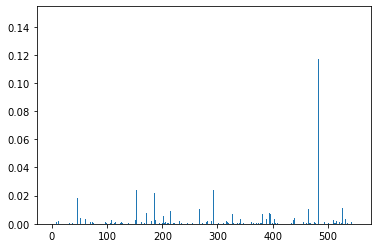

In [45]:
from matplotlib import pyplot as plt
plt.bar(range(LDA_nat.components_.shape[1]),LDA_nat.exp_dirichlet_component_[0])

#### measure similarity of the first 10 words in each topic with taste and health

In [31]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_md')

In [32]:
nlp(u'taste').similarity(nlp(u'sugar'))

0.5473916200990734

In [33]:
LDA_nat.components_[1][LDA_nat.components_[1].argmax()]
# cv_nat.get_feature_names()[LDA_nat.components_[0].argmin()]

196.40476040172896

In [34]:
cv_health.get_feature_names()[LDA_health.components_[0].argmax()]
LDA_health.components_[1][LDA_health.components_[1].argmax()]


507.803680265623

In [46]:
##get similarity with taste and health
import numpy as np
simil_nat_taste = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_nat.components_):
    simil_nat_taste[index,:] = np.asarray([nlp('taste').similarity(nlp(cv_nat.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
print('overall similarity of topic #1 to taste in Natural condition: '+str(round(simil_nat_taste[0,:].mean(),2)))

simil_nat_health = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_nat.components_):
    simil_nat_health[index,:] = np.asarray([nlp('health').similarity(nlp(cv_nat.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
print('overall similarity of topic #1 to health in Natural condition: '+str(round(simil_nat_health[0,:].mean(),2)))


simil_health_taste = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_health.components_):
    simil_health_taste[index,:] = np.asarray([nlp('taste').similarity(nlp(cv_health.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
print('overall similarity of topic #1 to taste in Health condition: '+str(round(simil_health_taste[0,:].mean(),2)))

simil_health_health = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_health.components_):
    simil_health_health[index,:] = np.asarray([nlp('health').similarity(nlp(cv_health.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
print('overall similarity of topic #1 to health in Health condition: '+str(round(simil_health_health[0,:].mean(),2)))


overall similarity of topic #1 to taste in Natural condition: 0.54
overall similarity of topic #1 to health in Natural condition: 0.18
overall similarity of topic #1 to taste in Health condition: 0.43
overall similarity of topic #1 to health in Health condition: 0.34


In [47]:
topic = LDA_nat.components_[0]
nlp('taste').similarity(nlp(cv_nat.get_feature_names()[topic.argsort()[-1]]))

0.45390466168900717

#### one model for both conditions

In [49]:
allreasons = list()
for s in range(dfInUse.shape[0]):
    for n in range(1,21):
        allreasons.append(dfInUse[str(n)+'_Reason1'].iloc[s])
        allreasons.append(dfInUse[str(n)+'_Reason2'].iloc[s])
        allreasons.append(dfInUse[str(n)+'_Reason3'].iloc[s])
        allreasons.append(dfInUse[str(n)+'_Reason4'].iloc[s])

In [50]:
allreasons    = list(compress(allreasons, pd.notna(allreasons)))

In [51]:
# from sklearn.feature_extraction.text import CountVectorizer
cv_all     = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_all    = cv_all.fit_transform(allreasons)


In [52]:
len(cv_all.get_feature_names())

834

In [53]:
dtm_all
LDA_all    = LatentDirichletAllocation(n_components=3,random_state=42)
LDA_all.fit(dtm_all)

LatentDirichletAllocation(n_components=3, random_state=42)

In [54]:
for index,topic in enumerate(LDA_all.components_):
    print(f'TOP 10 WORDS FOR TOPIC #{index+1} ARE:')
    print(''.join([cv_all.get_feature_names()[ind]+' '+ str(round(topic[ind], 2)) +'| ' for ind in topic.argsort()[:-11:-1]]))
    print('\n')


TOP 10 WORDS FOR TOPIC #1 ARE:
healthy 767.93| sugar 389.3| eat 376.55| like 347.49| love 307.47| high 233.01| don 231.9| food 192.04| taste 172.78| bad 151.3| 


TOP 10 WORDS FOR TOPIC #2 ARE:
like 658.85| tasty 329.31| sweet 260.3| delicious 181.08| unhealthy 163.29| looks 121.31| crunchy 109.29| dont 104.32| chocolate 101.81| flavor 98.84| 


TOP 10 WORDS FOR TOPIC #3 ARE:
good 961.29| taste 443.24| tastes 222.3| great 152.28| green 95.31| vitamins 94.11| favorite 92.98| vegetable 86.29| health 78.75| apples 66.58| 




In [55]:
simil_all_taste = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_all.components_):
    simil_all_taste[index,:] = np.asarray([nlp('taste').similarity(nlp(cv_all.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
    print(f'overall similarity of topic #{index+1} to taste: '+str(round(simil_nat_taste[index,:].mean(),2)))
    print('\n')

simil_all_health = np.full((5,10),np.nan)
for index,topic in enumerate(LDA_all.components_):
    simil_all_health[index,:] = np.asarray([nlp('health').similarity(nlp(cv_all.get_feature_names()[word])) for word in topic.argsort()[:-11:-1]])
    print(f'overall similarity of topic #{index+1} to health: '+str(round(simil_nat_health[index,:].mean(),2)))
    print('\n')


overall similarity of topic #1 to taste: 0.54


overall similarity of topic #2 to taste: 0.47


overall similarity of topic #3 to taste: 0.53


overall similarity of topic #1 to health: 0.18


overall similarity of topic #2 to health: 0.29


overall similarity of topic #3 to health: 0.28




### Classification based on condition

#### each word feature as an observation

In [56]:
n_words = len(cv_nat.get_feature_names())+len(cv_health.get_feature_names())
n_words_nat = len(cv_nat.get_feature_names())
X = np.full((n_words,300),np.nan) # 300 is spacy word vector length
y = np.full((n_words),np.nan)
for index,word in enumerate(cv_nat.get_feature_names()):
    X[index,:] = nlp(word).vector
    y[index]   = 0
for index,word in enumerate(cv_health.get_feature_names()):
    X[index+n_words_nat,:] = nlp(word).vector
    y[index+n_words_nat]   = 1
   

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

svm = LinearSVC(max_iter=5000)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))

# scores = cross_val_score(clf,X,y,cv = 6)
# print(scores)

              precision    recall  f1-score   support

         0.0       0.34      0.37      0.36       132
         1.0       0.38      0.34      0.36       145

    accuracy                           0.36       277
   macro avg       0.36      0.36      0.36       277
weighted avg       0.36      0.36      0.36       277



In [59]:
scores = cross_val_score(svm,X,y,cv=6)
print(scores)
print(scores.mean())

[0.53513514 0.48108108 0.41621622 0.48913043 0.45652174 0.51630435]
0.4823981590285938


#### classify only based on unique words in each condition

In [60]:
words_nat    = cv_nat.get_feature_names()
words_health = cv_health.get_feature_names()

words_common = set(words_nat).intersection(words_health)
words_common = list(words_common)
# len(words_common)
[words_nat.remove(word) for word in words_common];
[words_health.remove(word) for word in words_common];

In [61]:
# run classification based on words that were exclusively used in Natural or Health condition

n_words = len(words_nat)+len(words_health)
n_words_nat = len(words_nat)
X = np.full((n_words,300),np.nan) # 300 is spacy word vector length
y = np.full((n_words),np.nan)
for index,word in enumerate(words_nat):
    X[index,:] = nlp(word).vector
    y[index]   = 0
for index,word in enumerate(words_health):
    X[index+n_words_nat,:] = nlp(word).vector
    y[index+n_words_nat]   = 1
   

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

svm = LinearSVC(max_iter=5000)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53        51
         1.0       0.51      0.47      0.49        51

    accuracy                           0.51       102
   macro avg       0.51      0.51      0.51       102
weighted avg       0.51      0.51      0.51       102



In [63]:
scores = cross_val_score(svm,X,y,cv=6)
print(scores)
print(scores.mean())

[0.55882353 0.51470588 0.47058824 0.58208955 0.55223881 0.50746269]
0.5309847819724905


#### run classification with each word in each reason as an observation

In [64]:
# extract data
words_nat    = cv_nat.get_feature_names()
words_health = cv_health.get_feature_names()

reasons_nat    = list()
reasons_health = list()

for s in range(df_Nat.shape[0]):
    for n in range(1,21):
        for r in range(1,5):
            if isinstance(df_Nat[str(n)+'_Reason'+str(r)].iloc[s],str):
                reasons_nat = reasons_nat + df_Nat[str(n)+'_Reason'+str(r)].iloc[s].split()
for s in range(df_Health.shape[0]):
    for n in range(1,21):
        for r in range(1,5):
            if isinstance(df_Health[str(n)+'_Reason'+str(r)].iloc[s],str):
                reasons_health = reasons_health + df_Health[str(n)+'_Reason'+str(r)].iloc[s].split()


In [65]:
# remove stop words
[reasons_nat.remove(word) for word in reasons_nat if nlp.vocab[word].is_stop]; #spacy.lang.en.STOP_WORDS]#
[reasons_health.remove(word) for word in reasons_health if nlp.vocab[word].is_stop]; #spacy.lang.en.STOP_WORDS]#

# # type(spacy.lang.en.STOP_WORDS)
# # nlp.vocab['food'].is_stop
# # 'food' in spacy.lang.en.STOP_WORDS
# len(reasons_nat)
# for word in reasons_nat: 
# #     print(f' {word} | {nlp.vocab[word].is_stop}')


In [66]:
# create input to classifier
n_words = len(reasons_nat)+len(reasons_health)
n_words_nat = len(reasons_nat)

X = np.full((n_words,300),np.nan) # 300 is spacy word vector length
y = np.full((n_words),np.nan)
for index,word in enumerate(reasons_nat):
    X[index,:] = nlp(word).vector
    y[index]   = 0
for index,word in enumerate(reasons_health):
    X[index+n_words_nat,:] = nlp(word).vector
    y[index+n_words_nat]   = 1


In [67]:
np.isnan(X).any()

False

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

svm = LinearSVC(max_iter=5000)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.59      0.56      0.58      2565
         1.0       0.66      0.68      0.67      3193

    accuracy                           0.63      5758
   macro avg       0.62      0.62      0.62      5758
weighted avg       0.63      0.63      0.63      5758



In [69]:
# # use svm to classify
svm = LinearSVC(max_iter=5000)
scores = cross_val_score(svm,X,y,cv=6)
print(scores)
print(scores.mean())
# svm.fit(X_train,y_train)

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

# svm = LinearSVC(max_iter=5000)
# svm.fit(X_train,y_train)
# y_pred = svm.predict(X_test)

# print(classification_report(y_test,y_pred))


[0.57931753 0.65433707 0.56056265 0.55810318 0.62115685 0.582074  ]
0.5925918787022724


#### run classification with each reason as an observation

In [70]:
# extract data
words_nat    = cv_nat.get_feature_names()
words_health = cv_health.get_feature_names()

reasons_nat    = list()
reasons_health = list()

for s in range(df_Nat.shape[0]):
    for n in range(1,21):
        for r in range(1,5):
            if isinstance(df_Nat[str(n)+'_Reason'+str(r)].iloc[s],str):
                reasons_nat.append(df_Nat[str(n)+'_Reason'+str(r)].iloc[s]) 
for s in range(df_Health.shape[0]):
    for n in range(1,21):
        for r in range(1,5):
            if isinstance(df_Health[str(n)+'_Reason'+str(r)].iloc[s],str):
                reasons_health.append(df_Health[str(n)+'_Reason'+str(r)].iloc[s])


In [72]:
# reasons_nat

In [73]:
# remove stop words
from spacy.lang.en import STOP_WORDS
for ind,reason in enumerate(reasons_nat):
    temp = reason.split()
    [temp.remove(word) for word in temp if nlp.vocab[word].is_stop]; #spacy.lang.en.STOP_WORDS]#
    reasons_nat[ind] = ' '.join(temp)

for ind,reason in enumerate(reasons_health):
    temp = reason.split()
    [temp.remove(word) for word in temp if nlp.vocab[word].is_stop]; #spacy.lang.en.STOP_WORDS]#
    reasons_health[ind] = ' '.join(temp)


In [75]:
# reasons_nat

In [76]:
# create input to classifier
n_words = len(reasons_nat)+len(reasons_health)
n_words_nat = len(reasons_nat)

X = np.full((n_words,300),np.nan) # 300 is spacy word vector length
y = np.full((n_words),np.nan)
for index,reason in enumerate(reasons_nat):
    X[index,:] = nlp(reason).vector
    y[index]   = 0
    
for index,reason in enumerate(reasons_health):
    X[index+n_words_nat,:] = nlp(reason).vector
    y[index+n_words_nat]   = 1


In [77]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

svm = LinearSVC(max_iter=5000)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68       733
         1.0       0.68      0.67      0.67       725

    accuracy                           0.68      1458
   macro avg       0.68      0.68      0.68      1458
weighted avg       0.68      0.68      0.68      1458



In [78]:
svm = LinearSVC(max_iter=5000)
scores = cross_val_score(svm,X,y,cv=6)  
print(scores.mean())

0.6069317830245854


In [ ]:
# this will take a long time to run on PC
svm = LinearSVC(max_iter=5000)
scores = cross_val_score(svm,X,y,cv=X.shape[0],n_jobs=-1) # leave-one-out  
print(scores.mean())